ONLY SUMMER OLYMPICS IS TAKEN INTO ANALYSIS (1896-2016)

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [3]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season'] == 'Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [8]:
df = df.merge(region_df, on='NOC', how= 'left')

In [9]:
df.shape

(222552, 17)

In [10]:
df['region'].unique()
# historic misleadings like russia and ussr both are present, NAN also present IGNORED

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()
# some regions are null not able to convert from NOC coz some NOC are not part of any regions IGNORED

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

for medal tally groupby NOC and count medals

In [14]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

one hot coding Medals (many NAN values)

In [15]:
pd.get_dummies(df['Medal'])
#concatenate this with original dataset

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [16]:
df = pd.concat([df, pd.get_dummies(df['Medal'])],axis=1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [17]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
# this values are wrong coz data is organized such that for a team event every player has won a medal but in reality it shoul be just one medal 

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [18]:
medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
# new dataframe

In [19]:
df.shape

(221167, 20)

In [20]:
medal_tally.shape

(105636, 20)

In [21]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
# approx same medal tally ranks are right somee error in medal tally

In [22]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [23]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


### country wise medal tally

In [24]:
years = df['Year'].unique().tolist()

In [25]:
years.sort()

In [26]:
years.insert(0, 'Overall')

In [27]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [28]:
# country = df['region'].unique().tolist()
# country.sort()
# country
# country has an NAN value

In [29]:
country = df['region'].dropna().unique().tolist()
country.sort()

In [30]:
country.insert(0, 'Overall')

In [31]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [32]:
medal_df = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [33]:
medal_df[medal_df['region'] == 'India']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
436,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
437,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
790,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
791,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,0,0,0
792,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0
216985,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,India,NaN,0,0,0
218411,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN,0,0,0
222416,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0


In [34]:
def fetch_medal_tally(df, years, country):
    medal_df = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0 
    if years == "Overall" and country == "Overall":
        temp_df = medal_df
    if years == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if years != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(years)]
    if years != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['region'] == country) & (medal_df['Year'] == int(years))]
    
    if flag==1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
         x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [37]:
fetch_medal_tally(df, years = "Overall", country = "India")

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


### Overall Analysis
    no. of editions
    no. of cities
    no. of events/sports
    no. of atheletes
    participating nations

In [38]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


In [39]:
df['Year'].unique().shape[0]-1
# 1906 olympics was not considered as an olympic

df['City'].unique().shape[0]

df['Sport'].unique().shape[0]

df['Event'].unique().shape[0]

df['Name'].unique().shape[0]

df['region'].unique().shape[0]
# here's the problem thus is actually less than 206 but historically names of country changed, countries got divided 
# and so on thus 206

206

In [40]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


In [41]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')

In [48]:
nations_over_time.rename(columns = {'index': 'edition', 'Year':'No. of countries'}, inplace = True)

In [49]:
fig = px.line(nations_over_time, x='edition', y = 'No. of countries')
fig.show()

In [57]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')
events_over_time.rename(columns = {'index': 'edition', 'Year':'Event'}, inplace = True)

In [58]:
fig = px.line(events_over_time, x='edition', y = 'Event')
fig.show()

In [61]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [64]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Year', ylabel='Sport'>

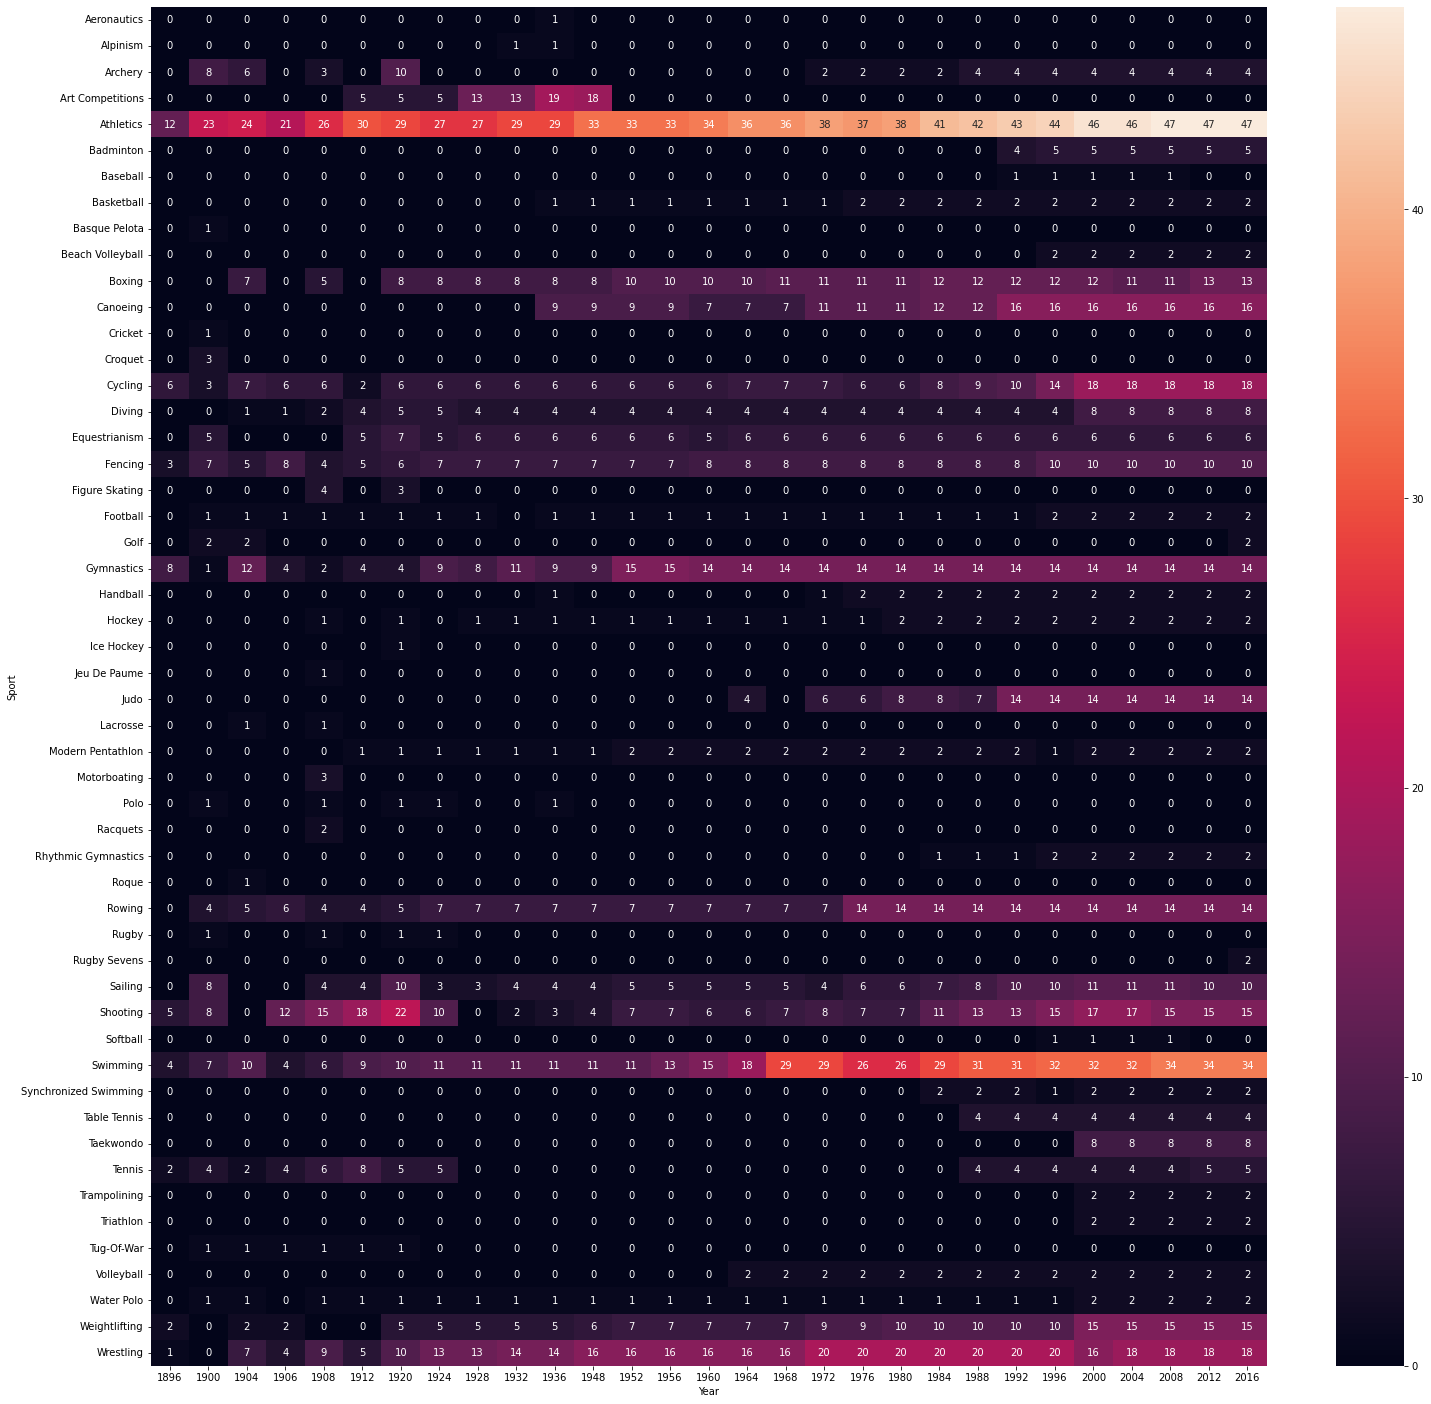

In [68]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

### most decorated atheletes

In [77]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df["Sport"]==sport]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace= True)
    return x


In [78]:
most_successful(df, 'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


## country wise analysis

    country wise medal tally per year
    which countries are good at heatmap (in a particular sport)
    most successful athletes (top 10) from that country)

In [79]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [80]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
new_df  = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [92]:
fig = px.line(final_df, x='Year', y = 'Medal')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

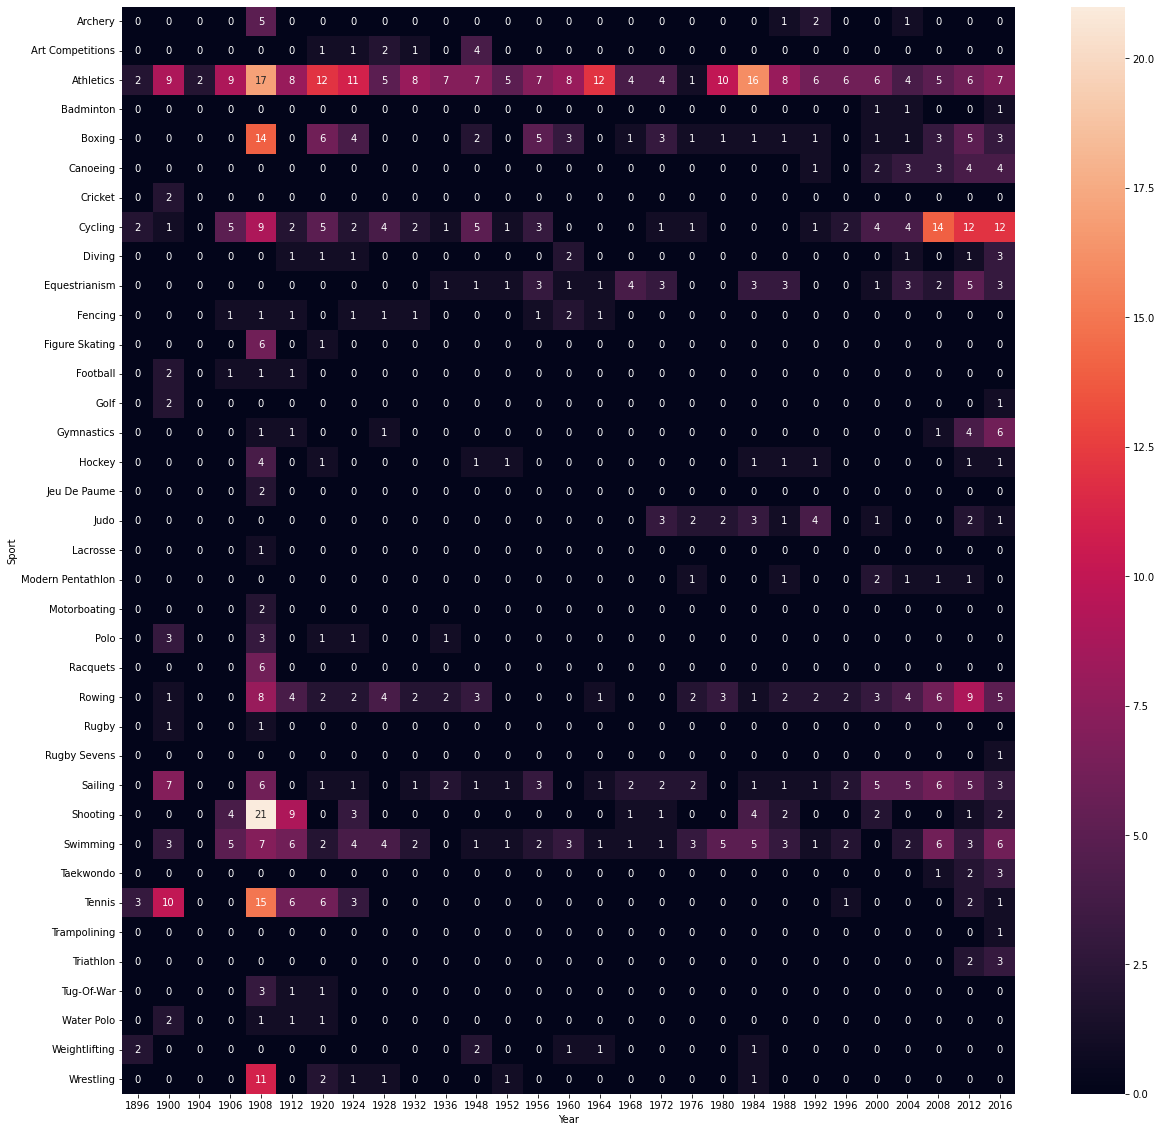

In [96]:
new_df  = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns = 'Year', values='Medal', aggfunc= 'count').fillna(0),annot=True)


In [100]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df["region"]==country]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace= True)
    return x

In [101]:
most_successful(df, 'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


In [104]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


In [108]:
athlete_df = df.drop_duplicates(subset = ['Name', 'region'])

In [111]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [112]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist = False, show_rug = False)
fig.show()

In [115]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [116]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Golf', 'Softball', 'Archery',  'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens',  'Beach Volleyball', 'Triathlon', 'Rugby', 'Ice Hockey']

In [118]:
x =[]
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.show()

In [124]:
athlete_df['Medal'].fillna('No Medal', inplace = True)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

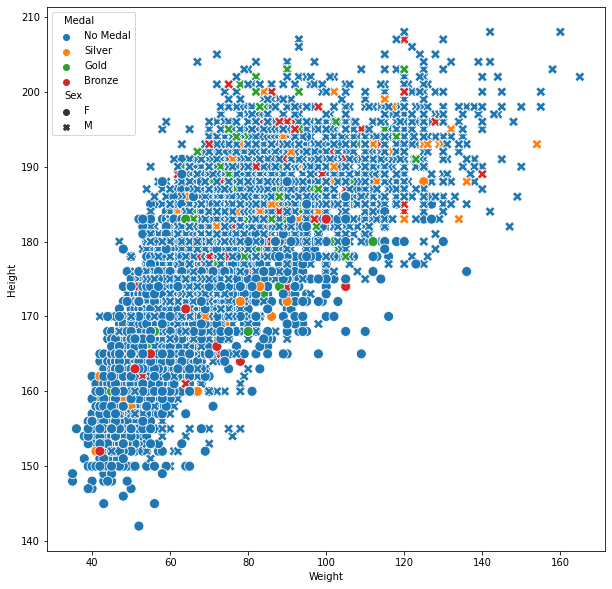

In [129]:
plt.figure(figsize = (10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(temp_df['Weight'], temp_df['Height'], hue=temp_df['Medal'], style=temp_df['Sex'], s=100)

In [ ]:
men = 